Import the data :

mongoimport --type csv -d energy_data -c policies --headerline --drop State_policies.csv
mongoimport --type csv -d energy_data -c renewables --headerline --drop MER_T10_01.csv
mongoimport --type csv -d energy_data -c biomass --headerline --drop biomass_energy_consump.csv
mongoimport --type csv -d energy_data -c geothermal --headerline --drop geothermal_energy_consump.csv
mongoimport --type csv -d energy_data -c hydropower --headerline --drop hydropower_energy_consump.csv
mongoimport --type csv -d energy_data -c solar --headerline --drop solar_energy_consump2.csv
mongoimport --type csv -d energy_data -c wind --headerline --drop wind_energy_consump.csv

In [80]:
from pymongo import MongoClient
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import matplotlib.ticker as ticker
import locale

In [31]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [32]:
# confirm that the new database was created
print(mongo.list_database_names())

['admin', 'classDB', 'config', 'energy_data', 'epa', 'fruitsDB', 'fruits_db', 'local', 'met', 'petsitly_marketing', 'uk_food']


In [33]:
# assign the database to a variable name
db = mongo['energy_data']

In [34]:
# review the collections in thedatabase
print(db.list_collection_names())

['solar', 'renewables', 'biomass', 'hydropower', 'wind', 'policies', 'geothermal']


In [35]:
# create a dataframe for each collection
policies_df = pd.DataFrame([p for p in db['policies'].find()])
wind_df = pd.DataFrame([w for w in db['wind'].find()])
renewables_df = pd.DataFrame([r for r in db['renewables'].find()])
biomass_df = pd.DataFrame([r for r in db['biomass'].find()])
geothermal_df = pd.DataFrame([r for r in db['geothermal'].find()])
hydropower_df = pd.DataFrame([r for r in db['hydropower'].find()])
solar_df = pd.DataFrame([r for r in db['solar'].find()])

In [36]:
# check that each df looks okay
policies_df.head()

,_id,State,Number of Policies and Incentives
0,65c1504308f80cf192a19ba3,AK,17
1,65c1504308f80cf192a19ba4,CA,154
2,65c1504308f80cf192a19ba5,CO,98
3,65c1504308f80cf192a19ba6,AL,19
4,65c1504308f80cf192a19ba7,CT,50


In [37]:
x_axis = np.arange(len(policies_df))
tick_locations = [value for value in x_axis]

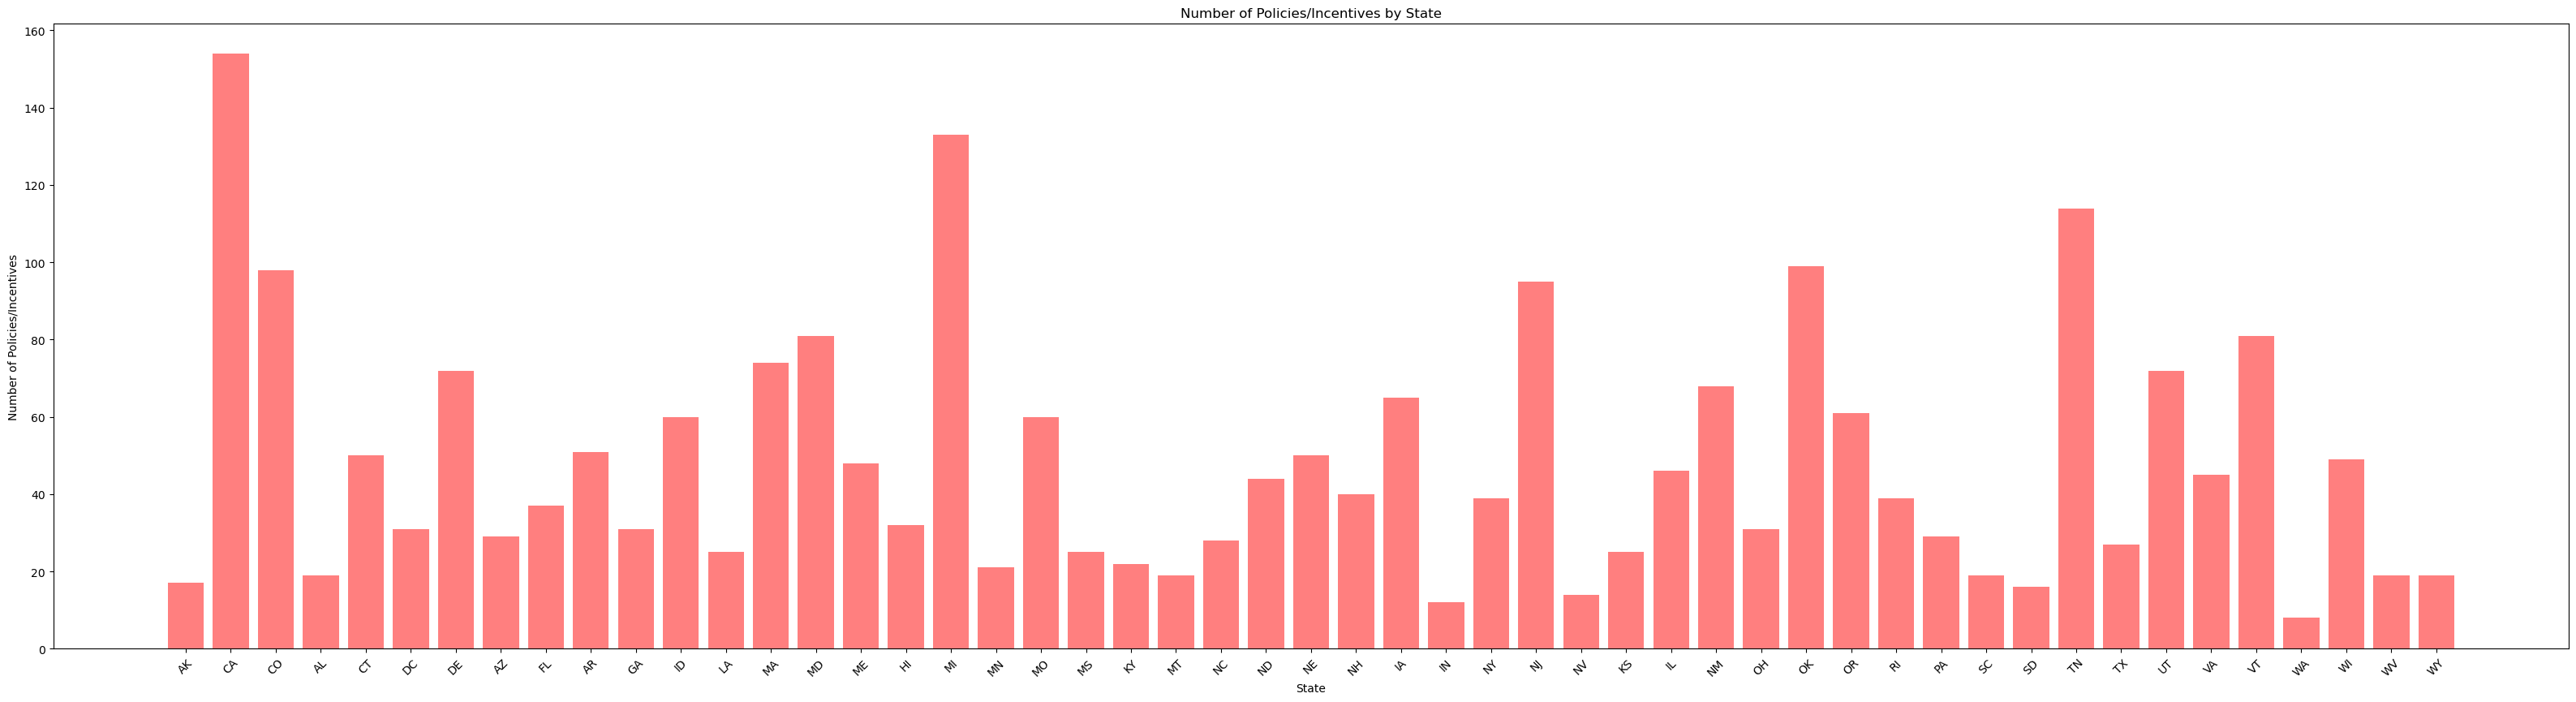

In [38]:
plt.figure(figsize=(40, 10))  
plt.bar(x_axis, policies_df["Number of Policies and Incentives"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, policies_df["State"], rotation=45)
plt.xlabel('State')
plt.ylabel('Number of Policies/Incentives')
plt.title('Number of Policies/Incentives by State')

plt.show()

In [39]:
# biomass_df.columns = biomass_df.columns.astype(int)

In [40]:
# Select the row corresponding to the year 2021(the most recent year we have data on)
biomass_2021 = biomass_df[['State', '2021']]
geothermal_2021 = geothermal_df[['State', '2021']]
hydropower_2021 = hydropower_df[['State', '2021']]
solar_2021 = solar_df[['State', '2021']]
wind_2021 = wind_df[['State', '2021']]

In [41]:
# Review all 
hydropower_2021.head()

,State,2021
0,AK,"14,937"
1,AZ,"52,824"
2,AL,"101,890"
3,CO,"14,135"
4,CT,"4,224"


In [42]:
# Merge or combine the DataFrames to create a single DataFrame
# combined_data = pd.merge(biomass_2021, geothermal_2021, on='State', suffixes=('_biomass', '_geothermal'))
# combined_data = pd.merge(combined_data, hydropower_2021, on='State')
# combined_data = pd.merge(combined_data, solar_2021, on='State')
# combined_data = pd.merge(combined_data, wind_2021, on='State', suffixes=('_solar', '_wind'))
combined_data = pd.merge(biomass_2021, geothermal_2021, on='State', suffixes=('_biomass', '_geothermal'), how='inner')
combined_data = pd.merge(combined_data, hydropower_2021, on='State', how='inner')
combined_data = pd.merge(combined_data, solar_2021, on='State', how='inner')
combined_data = pd.merge(combined_data, wind_2021, on='State', suffixes=('_solar', '_wind'), how='inner')

In [43]:
combined_data

,State,2021_biomass,2021_geothermal,2021_x,2021_y,2021
0,AL,"196,574",141,"101,890","4,608",0
1,AK,"8,503",186,"14,937",112,"1,169"
2,AR,"72,036",808,"35,630","5,649",0
3,GA,"253,190",315,"32,378","46,685",0
4,CO,"42,466",759,"14,135","24,935","133,772"
5,DC,"1,866",22,0,"1,470",0
6,HI,"9,041","1,633","1,017","17,596","5,818"
7,AZ,"37,237",345,"52,824","92,557","14,153"
8,ID,"43,091","2,324","70,710","6,074","23,704"
9,IA,"256,941","1,281","8,668","4,209","328,097"


In [44]:
combined_data.columns = ['State', 'Biomass', 'Geothermal', 'Hydropower', 'Solar', 'Wind']

In [46]:
combined_data.head()

,State,Biomass,Geothermal,Hydropower,Solar,Wind
0,AL,"196,574",141,"101,890","4,608",0
1,AK,"8,503",186,"14,937",112,"1,169"
2,AR,"72,036",808,"35,630","5,649",0
3,GA,"253,190",315,"32,378","46,685",0
4,CO,"42,466",759,"14,135","24,935","133,772"


In [47]:
combined_data = pd.merge(combined_data, policies_df[['State', 'Number of Policies and Incentives']], on='State')

In [48]:
combined_data.head()

,State,Biomass,Geothermal,Hydropower,Solar,Wind,Number of Policies and Incentives
0,AL,"196,574",141,"101,890","4,608",0,19
1,AK,"8,503",186,"14,937",112,"1,169",17
2,AR,"72,036",808,"35,630","5,649",0,51
3,GA,"253,190",315,"32,378","46,685",0,31
4,CO,"42,466",759,"14,135","24,935","133,772",98


In [51]:
# # Check for missing values in the columns
# missing_values = combined_data[['Biomass', 'Geothermal', 'Hydropower', 'Solar', 'Wind']].isnull().sum()
# print(missing_values)

# Remove commas from the columns and convert them to numeric types
combined_data[['Biomass', 'Geothermal', 'Hydropower', 'Solar', 'Wind']] = combined_data[['Biomass', 'Geothermal', 'Hydropower', 'Solar', 'Wind']].replace(',', '', regex=True).astype(float)

# Sum the consumption values across all renewable energy sources for each state
combined_data['Total Consumption'] = combined_data['Biomass'] + combined_data['Geothermal'] + combined_data['Hydropower'] + combined_data['Solar'] + combined_data['Wind']


In [52]:
combined_data.head()

,State,Biomass,Geothermal,Hydropower,Solar,Wind,Number of Policies and Incentives,Total Consumption
0,AL,196574.0,141.0,101890.0,4608.0,0.0,19,303213.0
1,AK,8503.0,186.0,14937.0,112.0,1169.0,17,24907.0
2,AR,72036.0,808.0,35630.0,5649.0,0.0,51,114123.0
3,GA,253190.0,315.0,32378.0,46685.0,0.0,31,332568.0
4,CO,42466.0,759.0,14135.0,24935.0,133772.0,98,216067.0


#remove when the total consumption is zero because this number only appears before the data was being collected

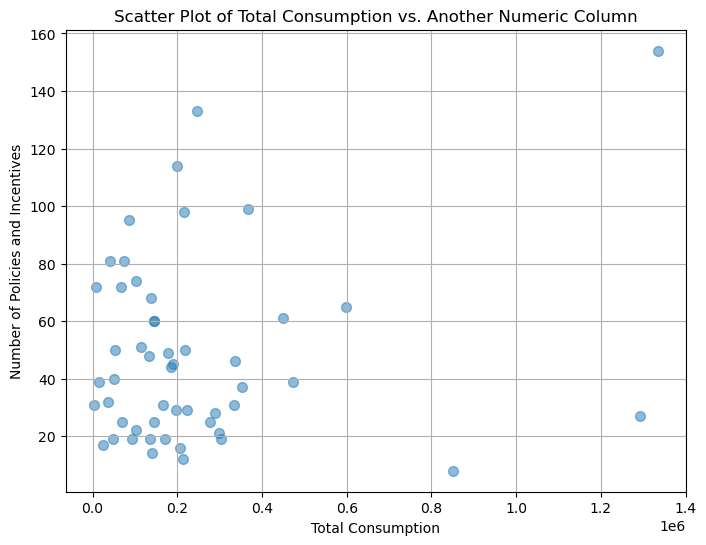

In [55]:
x = combined_data['Total Consumption']
y = combined_data['Number of Policies and Incentives']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=50, alpha=0.5)  # s is the marker size, alpha is the transparency

plt.title('Scatter Plot of Total Consumption vs. Another Numeric Column')
plt.xlabel('Total Consumption')
plt.ylabel('Number of Policies and Incentives')
plt.grid(True)
plt.show()

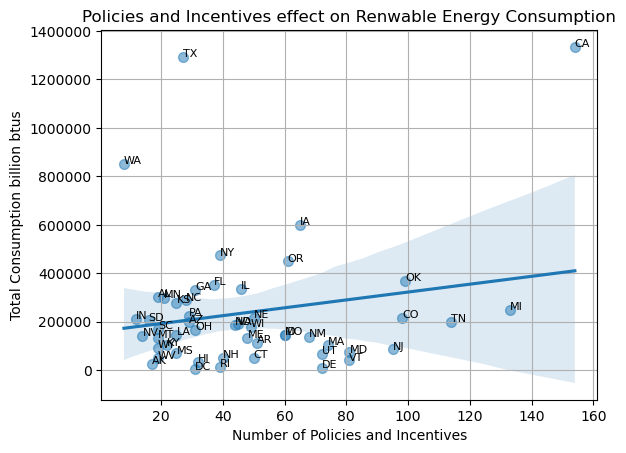

In [82]:

# Create a scatter plot with regression line
sns.regplot(data=combined_data, y='Total Consumption', x='Number of Policies and Incentives', scatter_kws={"s": 50, "alpha": 0.5})

# Add state labels for each dot
for i in range(len(combined_data)):
    plt.text(combined_data['Number of Policies and Incentives'][i], combined_data['Total Consumption'][i], combined_data['State'][i], fontsize=8)

# Set integer ticks for both axes(because otherwise it is in scientific notation)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Format y-axis tick labels as large numbers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

plt.grid(True)
plt.title('Policies and Incentives effect on Renwable Energy Consumption')
plt.xlabel('Number of Policies and Incentives')
plt.ylabel('Total Consumption billion btus')
plt.grid(True)
plt.show()

In [74]:
# Calculate R-squared
r_squared = r_value ** 2

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_squared)

Slope: 1624.0522871917117
Intercept: 160045.2208311892
R-squared: 0.03735780750822313


In [83]:
# Calculate correlation coefficient
correlation_coefficient = combined_data['Number of Policies and Incentives'].corr(combined_data['Total Consumption'])

print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.19328167918409425


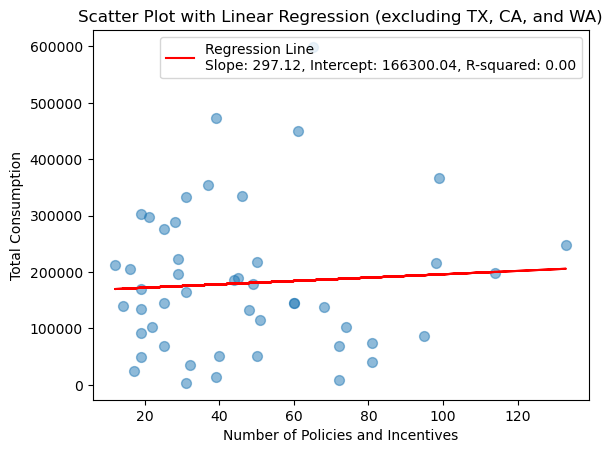

In [89]:
# Filter out outlier states
filtered_data = combined_data[~combined_data['State'].isin(['TX', 'CA', 'WA'])]

# Extract x and y values from the filtered DataFrame
x = filtered_data['Number of Policies and Incentives']
y = filtered_data['Total Consumption']

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create scatter plot
plt.scatter(x, y, s=50, alpha=0.5)

# Add linear regression line
plt.plot(x, slope * x + intercept, color='red', label=f'Regression Line\nSlope: {slope:.2f}, Intercept: {intercept:.2f}, R-squared: {r_value ** 2:.2f}')

# Add title and labels
plt.title('Scatter Plot with Linear Regression (excluding TX, CA, and WA)')
plt.xlabel('Number of Policies and Incentives')
plt.ylabel('Total Consumption')

# Add legend
plt.legend()

# Show plot
plt.show()
